In [1]:
import numpy as np
import matplotlib.pyplot as plt
import bemcs

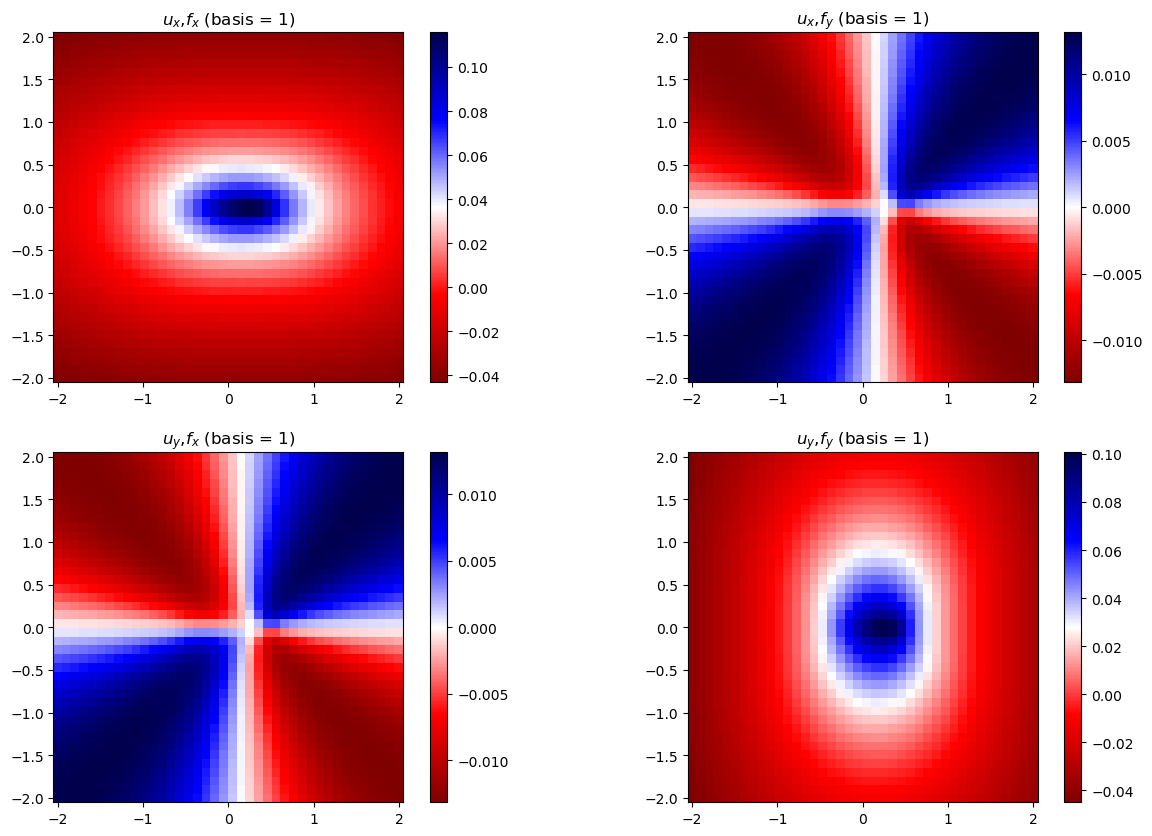

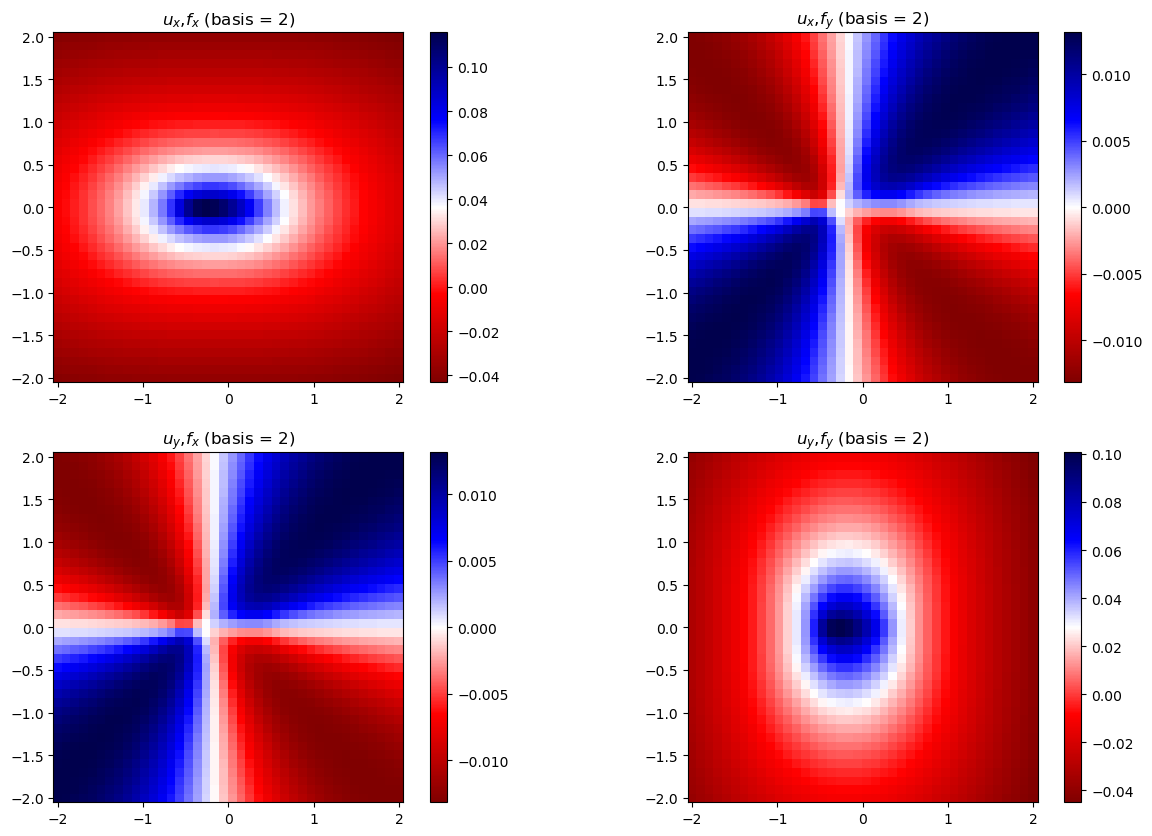

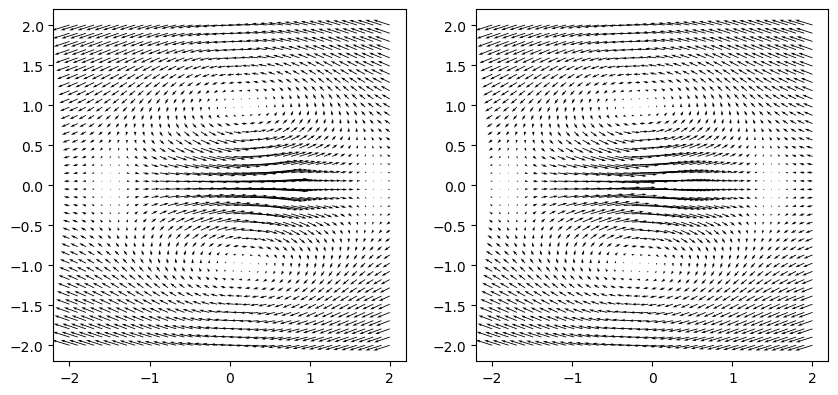

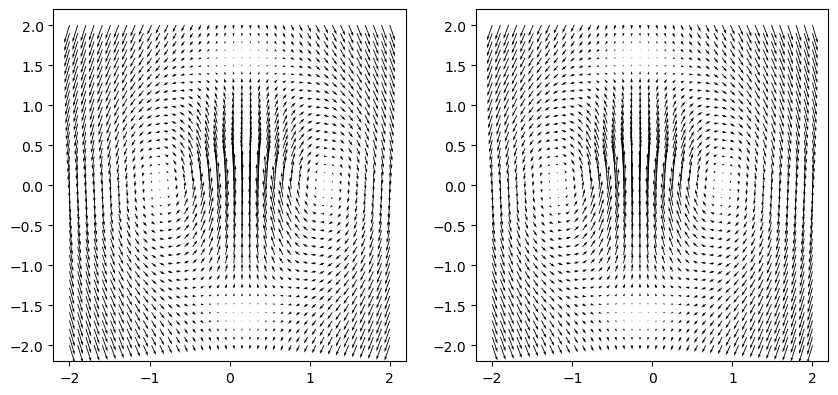

In [2]:
x_offset = 0.0
y_offset = 0.0

mu = 1
nu = 0.25
nx = 40
ny = 40
x_vec = np.linspace(-2.0, 2.0, nx)
y_vec = np.linspace(-2.0, 2.0, ny)
x_grid, y_grid = np.meshgrid(x_vec, y_vec)
# Displacement kernels [Nobs x (ux or uy) x (fx or fy) x 2 basis functions]

Dkernels, Skernels, Ekernels = (
    bemcs.displacements_stresses_linear_force_no_rotation_planestrain(
        x_grid.reshape(-1, 1),
        y_grid.reshape(-1, 1),
        xf=x_offset,
        yf=y_offset,
        w=0.5,
        nu=nu,
        mu=mu,
    )
)

# plot displacements
for count in range(0, 2):
    basisfunc = count

    plt.figure(count + 1, figsize=(15, 10))
    for i in range(0, 2):
        for j in range(0, 2):
            plotval = i * 2 + j + 1
            toplot = Dkernels[:, i, j, basisfunc]
            plt.subplot(2, 2, plotval)
            plt.pcolor(
                x_grid,
                y_grid,
                toplot.reshape(ny, nx),
                cmap="seismic_r",
            )
            plt.colorbar()
            if i == 0:
                str1 = "$u_x$"
            else:
                str1 = "$u_y$"
            if j == 0:
                str2 = "$f_x$"
            else:
                str2 = "$f_y$"
            plt.title(str1 + "," + str2 + " (basis = " + str(basisfunc + 1) + ")")
            plt.gca().set_aspect("equal", adjustable="box")
    plt.show()

# kernels: [Nobs x (ux or uy) x (fx or fy) x 2 basis functions]
# fx displacements
plt.figure(figsize=(10, 6))
for basisfunc in range(2):
    plt.subplot(1, 2, basisfunc + 1)
    ux = Dkernels[:, 0, 0, basisfunc]
    uy = Dkernels[:, 1, 0, basisfunc]
    plt.quiver(x_grid, y_grid, ux, uy, scale=0.2, units="xy")
    plt.gca().set_aspect("equal", adjustable="box")
plt.show()

# fy displacements
plt.figure(figsize=(10, 6))
for basisfunc in range(2):
    plt.subplot(1, 2, basisfunc + 1)
    ux = Dkernels[:, 0, 1, basisfunc]
    uy = Dkernels[:, 1, 1, basisfunc]
    plt.quiver(x_grid, y_grid, ux, uy, scale=0.2, units="xy")
    plt.gca().set_aspect("equal", adjustable="box")
plt.show()